In [1]:
import io
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%cd "D:\Imarticus\stat"

D:\Imarticus\stat


In [3]:
sf=pd.read_csv('Air_Traffic_Passenger_Statistics.csv')

In [4]:
sf.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


Time series forecasting or IOT Dsata forecasting <br>
In Time Series Data has datetime or data variable which is the most critical variable.<br>
In multi variate variables data, variables like weekday, month, quarter, year are extracted and data variable is deleted.<br>

Default Data Format "YYYY-mm-dd" or datetime format "YYYY-mm-dd HH:MM:SS"<br>
There are three types of time series Data.<br>
    1.Univariate Timeseries - Data & y(numeric) - only 2 variables<br>
    2. Multivariate Timeseries- Along with independent variables extracted from data other independent variables will also be there. Regression algorithm are used<br>
    3. Panel Data - Along with Date and other independent variables an ID variable will also be there (country,company,Region).<br>

In [6]:
# Create Univariate Time Series from Data
sf.columns

Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count'],
      dtype='object')

In [7]:
monthly_airtraffic=sf[['Activity Period','Passenger Count']]

In [8]:
monthly_airtraffic.head()

,Activity Period,Passenger Count
0,200507,27271
1,200507,29131
2,200507,5415
3,200507,35156
4,200507,34090


In [9]:
monthly_airtraffic.info()
# we need to convert date into dateformat

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26576 entries, 0 to 26575
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Activity Period  26576 non-null  int64
 1   Passenger Count  26576 non-null  int64
dtypes: int64(2)
memory usage: 415.4 KB


In [10]:
monthly_airtraffic['Activity Period']=pd.to_datetime(monthly_airtraffic['Activity Period'],format="%Y%m",errors='coerce')
# %Y-YYYY & %y-YY & %m-mm & %M-month in text & %d-dd
# pd.to_datetime()- dateformat should be given according to existing format

C:\Users\Eswar Aditya\AppData\Local\Temp\ipykernel_10728\3047334446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_airtraffic['Activity Period']=pd.to_datetime(monthly_airtraffic['Activity Period'],format="%Y%m")


In [ ]:
# Resample Timeseries into different Time frequencies
# 60min - hour, D-daily, M-Monthly,Q-Quaterly,A-Annual
# Statistical function like sum(),mean(),median() or std() must be given
# after resampling  Date will be automatically indexed into Rows
# In time series Data will be indexed into row numbers

In [11]:
monthly_airtraffic=monthly_airtraffic.resample('M',on='Activity Period').sum()

In [12]:
monthly_airtraffic.head() # In Timeseries Row indexing of data is must

,Passenger Count
Activity Period,
2005-07-31,3225769
2005-08-31,3195866
2005-09-30,2740553
2005-10-31,2770715
2005-11-30,2617333


<Axes: xlabel='Activity Period'>

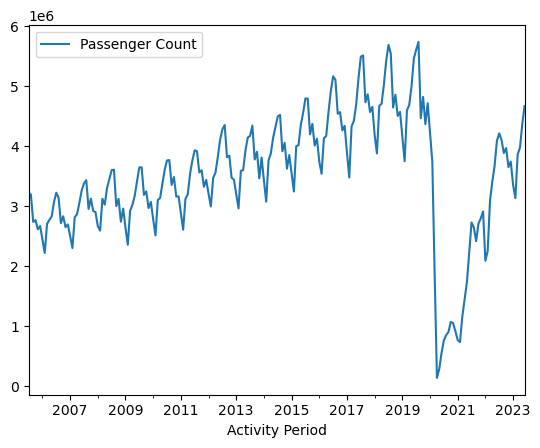

In [13]:
# Time series plot- Line plot
monthly_airtraffic.plot()

<Axes: xlabel='Activity Period'>

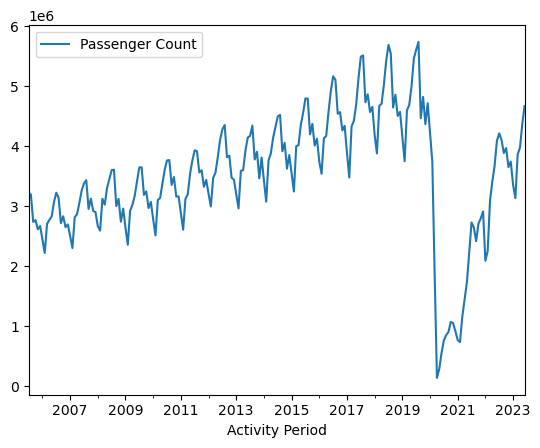

In [14]:
# Time series plot- Line plot
monthly_airtraffic.plot(kind='line')

Univariate Timeseries forecasting - data must be stationary.<br>
_>Statinonary means,constant variance and constant covariance.<br>
Typically with trends and seasonality are not stationary data as time will effect changes at different time points.<br>
Trends - up,down,neutral,horizontal.<br>
seasonality-Based on 4 seasons- summer,rainy,spring,and winter <br>

Augmented Dickey Fuller test of Stationary- it identifies weather data is stationary or not <br>
Null- Unit Root present or Data is not stationary<br>
Alt- No unit Root or Data is Stationary<br>

The Interpretetion of test os based on P-value. <br>
p-value is < 0.05,reject null & 
p-value is > 0.05, Fail to reject null<br>

In [15]:
from statsmodels.tsa.stattools import adfuller

In [17]:
adfuller(monthly_airtraffic)
# Since p-value=0.04738274895948847 is lessthan 0.05, reject null

(-2.8828186197723187,
 0.04738274895948847,
 13,
 202,
 {'1%': -3.4631437906252636,
  '5%': -2.8759570379821047,
  '10%': -2.574454682874228},
 5610.859243355068)

Kwaitkowski-Phillips- Schemidt-shin test for stationarity. <br>
Null hypothesis that x is level or trend stationary.<br>
Alt hypothesis that x is not level or trend stationary. <br>

P-value must be greater than 0.05, Fail to Reject Null<br>

In [18]:
from statsmodels.tsa.stattools import kpss

In [19]:
kpss(monthly_airtraffic)
# Since p-value=0.1 is greater than 0.05, Fail to reject null.

C:\Users\Eswar Aditya\AppData\Local\Temp\ipykernel_10728\835568425.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss(monthly_airtraffic)


(0.28940596366831767,
 0.1,
 9,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

If the data is not stationary, difference must be done using lags<br>
y-1,2,3,4,5,6,7,8,9<br>
lag 1 of y - 1,2,3,4,5,6,7,8,9<br>
first order difference =y-lag 1 of y<br>
lag 2 of y - 1,2,3,4,5,6,7,8,9<br>
second order diff=y-lag 2 of y<br>
.diff()- differencing function - by default order differencing<br>

After differencing repeat ADF test and Kpss test on differenced data

In [20]:
monthly_airtraffic_diff=monthly_airtraffic.diff()

In [21]:
monthly_airtraffic_diff=monthly_airtraffic_diff.dropna()

<Axes: xlabel='Activity Period'>

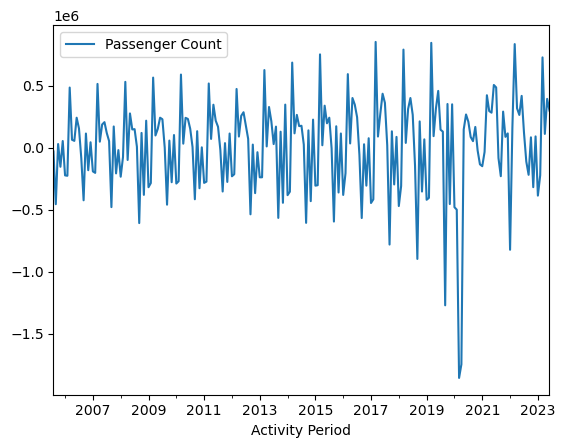

In [22]:
monthly_airtraffic_diff.plot()

In [25]:
from statsmodels.tsa.stattools import adfuller

In [26]:
adfuller(monthly_airtraffic_diff)
# Since p-value=0.003238544842151474 is lessthan 0.05, reject null

(-3.769208000734723,
 0.003238544842151474,
 15,
 199,
 {'1%': -3.4636447617687436,
  '5%': -2.8761761179270766,
  '10%': -2.57457158581854},
 5589.560959469265)

In [23]:
from statsmodels.tsa.stattools import kpss

In [27]:
kpss(monthly_airtraffic_diff)
# Since p-value=0.1 is greater than 0.05, Fail to reject null.

C:\Users\Eswar Aditya\AppData\Local\Temp\ipykernel_10728\212857409.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss(monthly_airtraffic_diff)


(0.03410470123931851,
 0.1,
 3,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Decomposition of timeseries- Breaking timeseries into components<br>
a)Trend - up,down,neutral or horizontal <br>
b) Seasonality - Based on 4 seasons<br>
c) Cyclicality - Based on Business Cycles(Longterm trend 8-12 years)<br>
d) Random or residual or Error = y- lagged value of y<br>

Holt-Winters method of decomposition<br>
Additive MOdel (non seasonal Data) =yt=Tt+St+Ct+Et<br>
Multiplicative model (seasonal Data) =yt= Tt*St*Ct*Et<br>

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

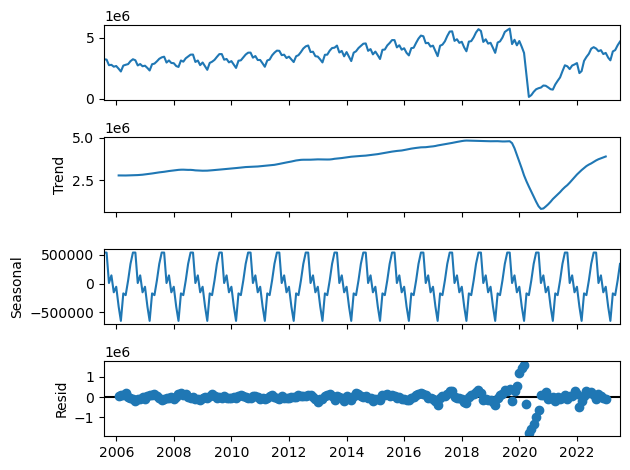

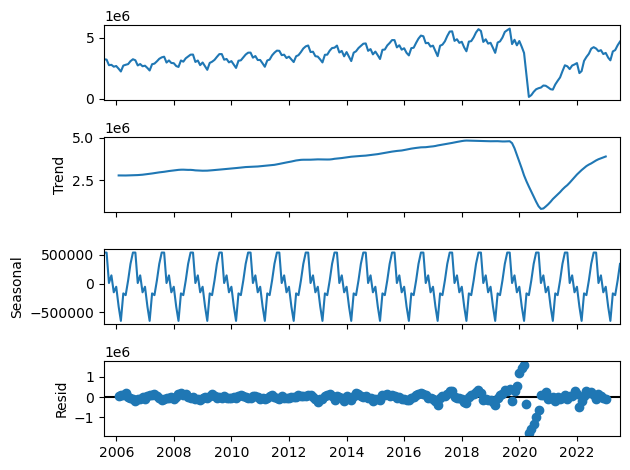

In [29]:
seasonal_decompose(monthly_airtraffic).plot()

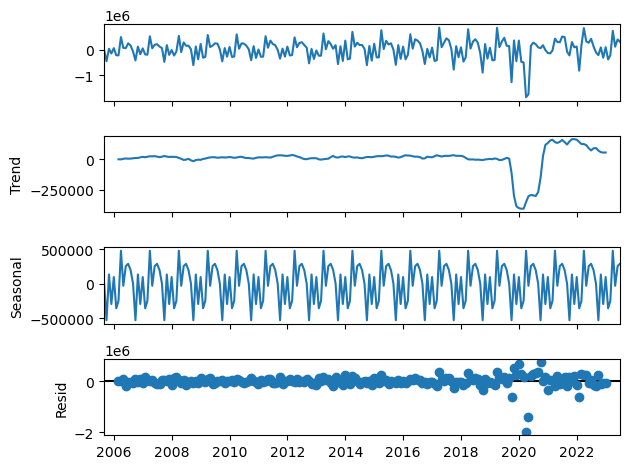

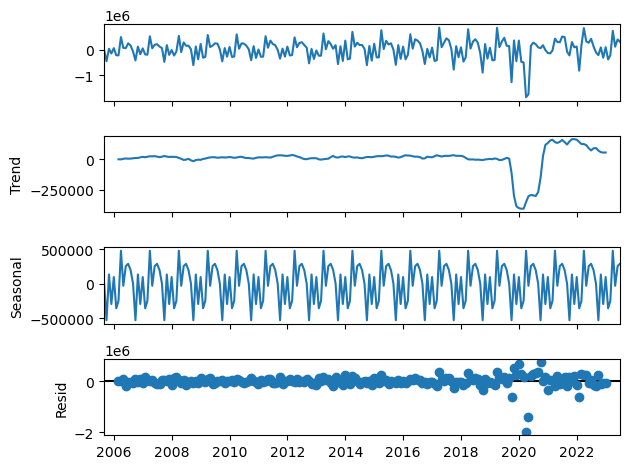

In [30]:
seasonal_decompose(monthly_airtraffic_diff).plot()

Univariate Timeseries forecasting there are many methods like simple moving average,exponential moving average,holt-winters method,etc. but most important is arima forecasting.<br>

Auto Regressive Integrated Moving Average (ARIMA) is a multiple linear regression model with 2 equations for forecassting furture timeperiods based on historical timeperiods.

non seasonal ARIMA - ARIMA (p,d,q)- p,d,q, are lags between 0,0,0 till 5,2,5.
Seasonal ARIMA - SARIMAX(p,d,q)[P,D,Q][time frequency]
[P,D,Q][time frequency] are seasonal parameteres

AR(p) - Autoregressive is linear relationship between y and lagged value of y. Yt=B0+B1yt-1+B2yt-2+.......+Nnyty-n (positive terms)

I(d) - Integrated parameters which is the differencing to be done for bringing data to stationary

MA(q) - Moving Average is linear relationship between errors and lagged value of errors or residual or y-lag of y
yt=B0-B1et-1B2et-2-........Bnet-n(Negative Terms)

In ARIMA identifying p,d,q values os most critical
d is the differencing to be done to bring data to stationary (by default zero)
ACF plot or Autocorrelation plot identifies the lag value q in MA(q)
PACF plot or Partial Autocorrelation plot identifies the lag value q in AR(p)

Blue region or dotted lines region depicts 95% confidence level and indicates significance. Anything with in dotted lines or blue area statistically close to zero and anything above is statistically close to non zero.

From ACF plot, the first lag at which is a big change - value of q 
From PACF plot, the first lag at which it becomes negative - value of p

In [31]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

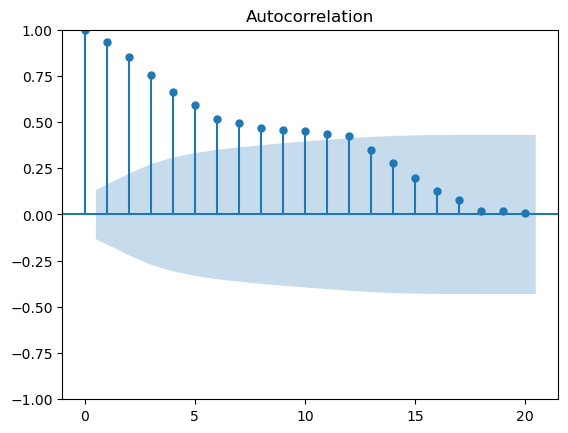

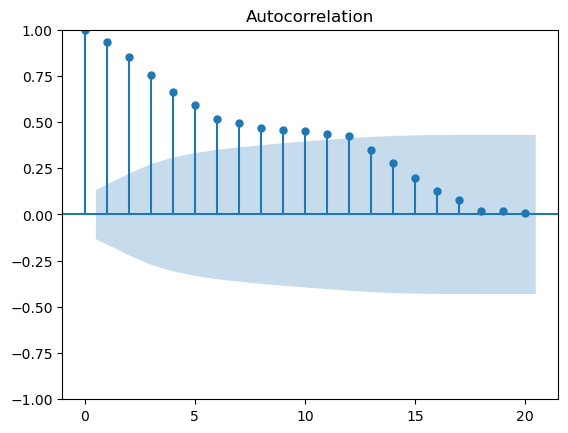

In [34]:
plot_acf(monthly_airtraffic,lags=20)

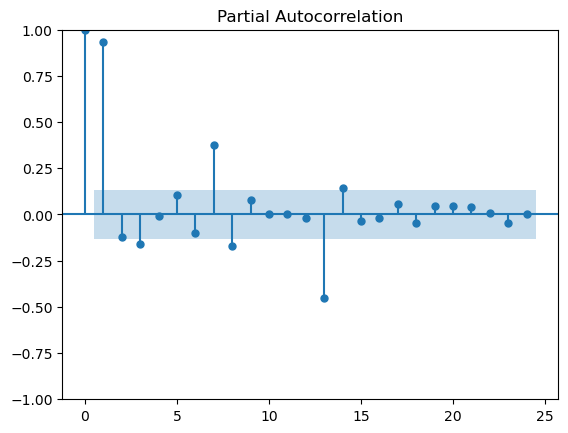

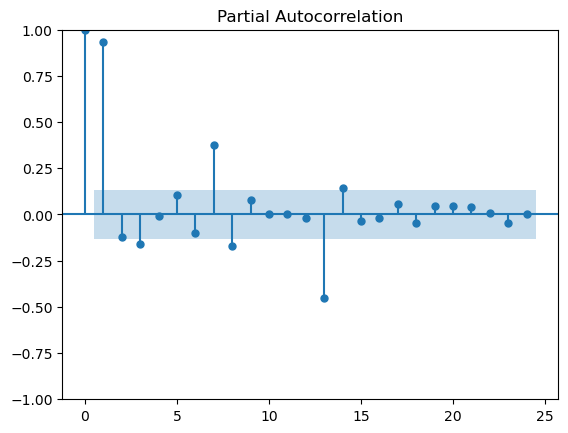

In [33]:
plot_pacf(monthly_airtraffic)

Auto ARIMA is a function in pmdarima library that tries all combinations of p.d.q values from 0,0,0 till 5,2,5.
it identifies the best fit lag order combnations based on lowest Alkaike's Information Criterion (AIC).
By default Sarimax model is build and if seasonal parameterss are not generated then it is a non seasonal ARIMA model

In [35]:
!pip install pmdarima

     ---------------------------------------- 0.0/566.2 kB ? eta -:--:--
     ------ -------------------------------- 92.2/566.2 kB 1.7 MB/s eta 0:00:01
     ------------------ ------------------- 276.5/566.2 kB 2.8 MB/s eta 0:00:01
     -------------------------------------  563.2/566.2 kB 3.9 MB/s eta 0:00:01
     -------------------------------------  563.2/566.2 kB 3.9 MB/s eta 0:00:01
     -------------------------------------- 566.2/566.2 kB 2.7 MB/s eta 0:00:00
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/ea/8f/216de5d7bede3e26a7131b427a8aadade032f03f9c8ee88792def02e2cf4/Cython-3.0.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB 7.9 MB/s eta 0:00:01
   ------- -------------------------------- 0.6/2.8 MB 7.0 MB/s eta 0:00:01
   ------------ --------------------------- 0.9/2.8 MB 7.0 MB/s eta 0:00:0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [36]:
from pmdarima.arima import auto_arima

In [37]:
arima_model=auto_arima(monthly_airtraffic)

In [38]:
arima_model.summary()
# SARIMAX(0,1,0) - Non seasonal model
#AIC - 6137.387
# P>|z| must be lessthan 0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  216
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3067.693
Date:                Mon, 11 Sep 2023   AIC                           6137.387
Time:                        12:18:38   BIC                           6140.757
Sample:                    07-31-2005   HQIC                          6138.749
                         - 06-30-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.442e+11   8.06e+09     17.885      0.000    1.28e+11     1.6e+11
===================================================================================
Ljung-Box (L1) (Q):                   2.12   Jarque-Bera (JB):               185.00
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               3.41   Skew:                            -1.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Ljung box Test of residuals 
Null - model does not show lack of fit or model is fine
Alt - model does show lack of fit and modek is not fine.

p-value must be greater than 0.05, fail to reject (accept) null.
since prob(Q): 0.15 is greater than 0.05,fail to reject null.

In [39]:
arima_model.predict(n_periods=36)

2023-07-31    4673688.0
2023-08-31    4673688.0
2023-09-30    4673688.0
2023-10-31    4673688.0
2023-11-30    4673688.0
2023-12-31    4673688.0
2024-01-31    4673688.0
2024-02-29    4673688.0
2024-03-31    4673688.0
2024-04-30    4673688.0
2024-05-31    4673688.0
2024-06-30    4673688.0
2024-07-31    4673688.0
2024-08-31    4673688.0
2024-09-30    4673688.0
2024-10-31    4673688.0
2024-11-30    4673688.0
2024-12-31    4673688.0
2025-01-31    4673688.0
2025-02-28    4673688.0
2025-03-31    4673688.0
2025-04-30    4673688.0
2025-05-31    4673688.0
2025-06-30    4673688.0
2025-07-31    4673688.0
2025-08-31    4673688.0
2025-09-30    4673688.0
2025-10-31    4673688.0
2025-11-30    4673688.0
2025-12-31    4673688.0
2026-01-31    4673688.0
2026-02-28    4673688.0
2026-03-31    4673688.0
2026-04-30    4673688.0
2026-05-31    4673688.0
2026-06-30    4673688.0
Freq: M, dtype: float64

<Axes: >

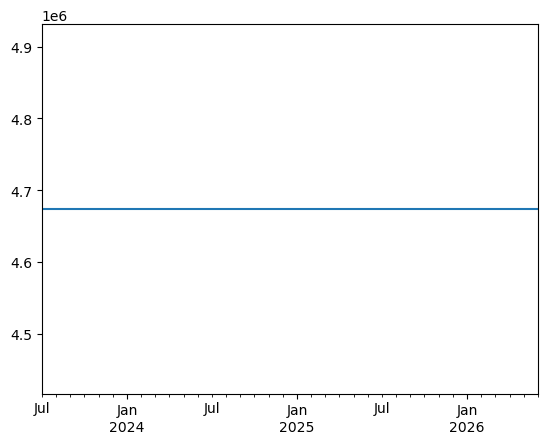

In [40]:
arima_model.predict(n_periods=36).plot()

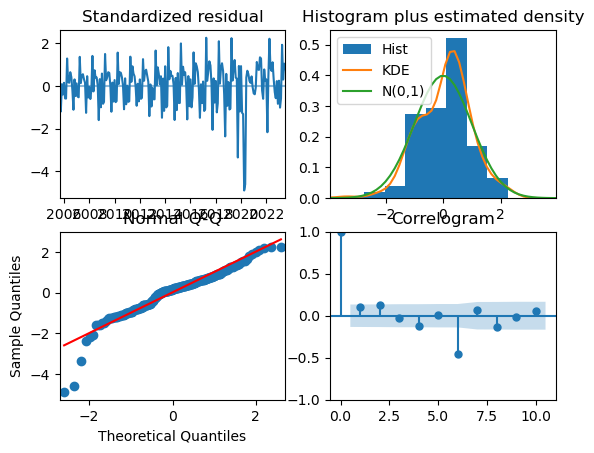

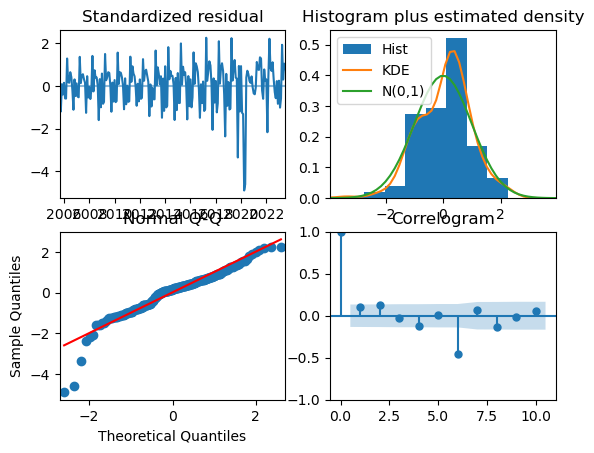

In [41]:
arima_model.plot_diagnostics()

In [42]:
!pip install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/88/d6/ebc199ba1fd99719c8680b3fb90663aa4888871364c69bbf9629148b9724/prophet-1.1.4-py3-none-win_amd64.whl.metadata
     ---------------------------------------- 0.0/83.2 kB ? eta -:--:--
     ---------------------------------------  81.9/83.2 kB 1.5 MB/s eta 0:00:01
     ---------------------------------------- 83.2/83.2 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/47.9 kB ? eta -:--:--
     ---------------------------------------- 47.9/47.9 kB 2.4 MB/s eta 0:00:00
  Obtaining dependency information for holidays>=0.25 from https://files.pythonhosted.org/packages/e0/7e/9d3b9387ac87500ae215da875660d219f7734e0dbe9437898a7388f0855c/holidays-0.32-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/25/d4/592f53ce2f8dde8be5720851bd0ab71cc2e76c55978e4163ef1ab7e389bb/importlib_resources-6.0.1-py3-none

In [43]:
from prophet import Prophet

In [44]:
monthly_airtraffic_df=monthly_airtraffic.reset_index()

In [45]:
monthly_airtraffic_df.columns=['ds','y']

In [47]:
m=Prophet()
m.fit(monthly_airtraffic_df)

12:36:09 - cmdstanpy - INFO - Chain [1] start processing
12:36:12 - cmdstanpy - INFO - Chain [1] done processing


In [60]:
future=m.make_future_dataframe(periods=36,freq='M')

In [61]:
forecast=m.predict(future)

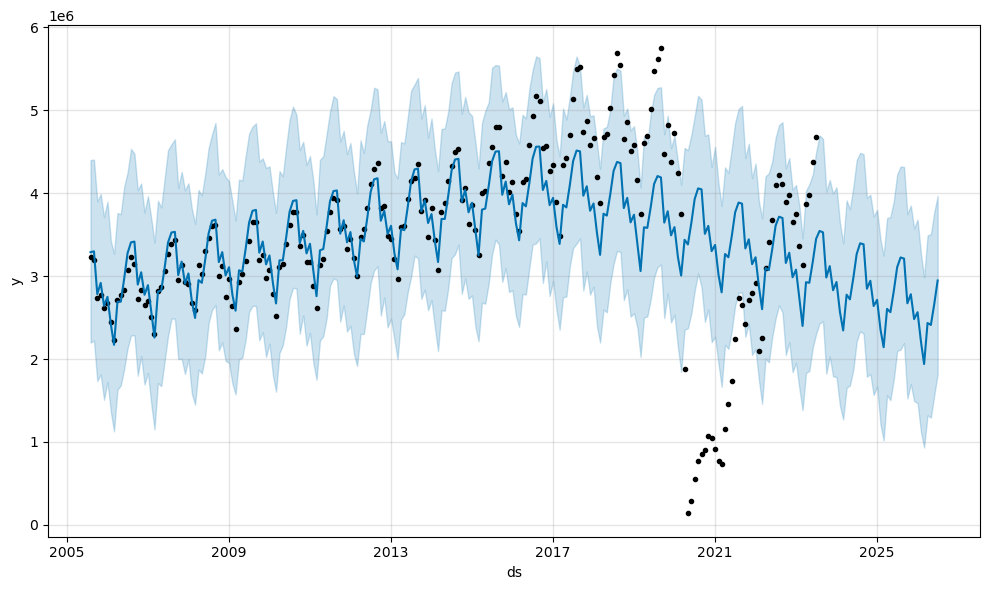

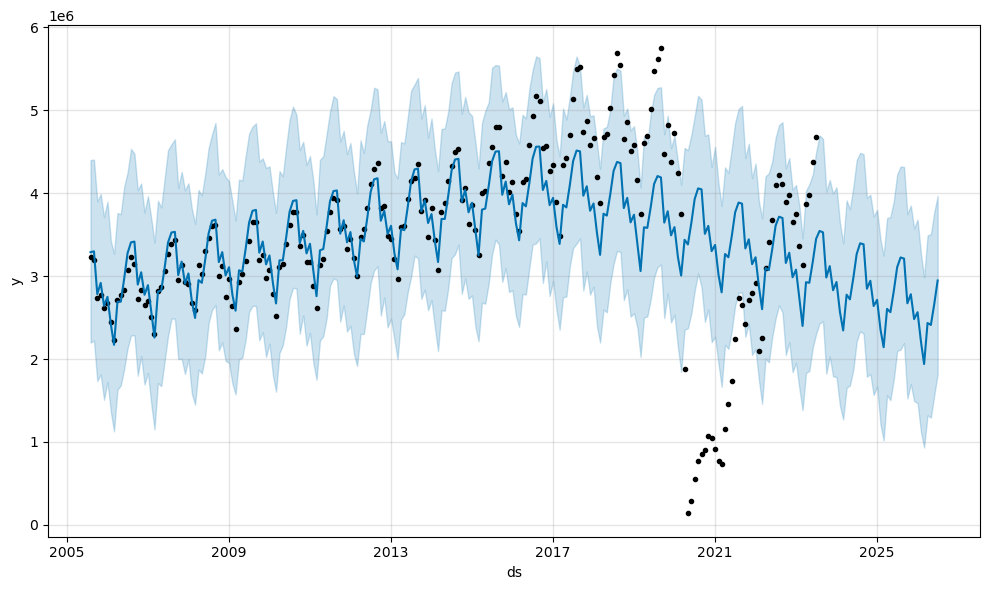

In [62]:
m.plot(forecast)

In [63]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
247,2026-02-28,2.626280e+06,9.326027e+05,2.984651e+06,2.570303e+06,2.679482e+06,-687021.890591,-687021.890591,-687021.890591,-687021.890591,-687021.890591,-687021.890591,0.0,0.0,0.0,1.939258e+06
248,2026-03-31,2.612245e+06,1.321384e+06,3.489024e+06,2.552236e+06,2.668418e+06,-178386.284009,-178386.284009,-178386.284009,-178386.284009,-178386.284009,-178386.284009,0.0,0.0,0.0,2.433859e+06
249,2026-04-30,2.598663e+06,1.293812e+06,3.503522e+06,2.536448e+06,2.657162e+06,-188129.448651,-188129.448651,-188129.448651,-188129.448651,-188129.448651,-188129.448651,0.0,0.0,0.0,2.410533e+06
250,2026-05-31,2.584628e+06,1.568082e+06,3.772261e+06,2.520439e+06,2.645714e+06,82244.436403,82244.436403,82244.436403,82244.436403,82244.436403,82244.436403,0.0,0.0,0.0,2.666872e+06
251,2026-06-30,2.571045e+06,1.818686e+06,3.964444e+06,2.503982e+06,2.633885e+06,375255.291799,375255.291799,375255.291799,375255.291799,375255.291799,375255.291799,0.0,0.0,0.0,2.946301e+06


In [64]:
np.round(forecast[['ds','yhat','yhat_lower','yhat_upper']],2).head(36)

,ds,yhat,yhat_lower,yhat_upper
0,2005-07-31,3286865.07,2197252.70,4397001.23
1,2005-08-31,3297791.39,2223591.68,4403181.14
2,2005-09-30,2782509.01,1735518.53,3897991.27
3,2005-10-31,2916886.87,1813863.58,3988687.35
4,2005-11-30,2641152.40,1508702.10,3710630.17
5,2005-12-31,2748781.08,1722889.18,3895336.75
6,2006-01-31,2413795.19,1358254.00,3418673.47
7,2006-02-28,2170775.26,1128193.33,3269774.75
8,2006-03-31,2689994.20,1629636.64,3759349.10
9,2006-04-30,2690492.98,1681653.38,3744985.83


<Axes: >

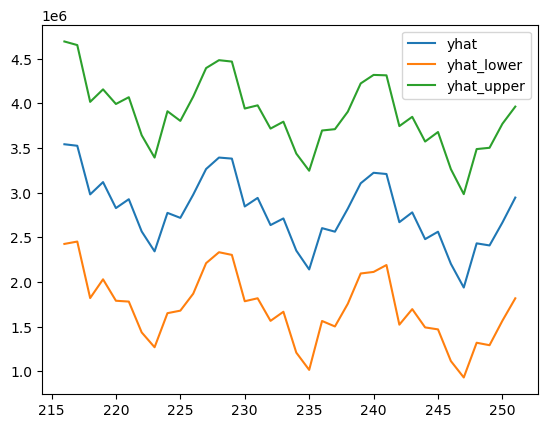

In [65]:
np.round(forecast[['yhat','yhat_lower','yhat_upper']],2).tail(36).plot(kind='line')